# XGBoost 기본 학습기
- 이 장에서는 XGBoost에 있는 다양한 기본 학습기를 분석하고 적용한다.
- XGBoost에서 기본 학습기는 부스팅 단계마다 반복적으로 사용되는 개별 모델이다.
- 가장 많이 사용하는 것은 트리이다. XGBoost에서 gbtree로 설정할 수 있는 기본 결정 트리 외에도 기본 학습기를 위한 추가 옵션에는 gblinear와 dart가 있다. 또한 XGBoost는 기본 학습기와 트리 앙상블 알고리즘으로 랜덤 포레스트를 제공한다.
- 이장에서 실험해보겠다.
---
- 다른 기본 학습기를 적요하는 방법을 배우면 XGBoost에 대한 지식을 크게 확장할 수 있다. 
- 더 많은 모델을 구축할 수 있는 능력을 갖게 될 것이며, 선형, 트리 기반, 랜덤 포레스트 머신러닝 알고리즘을 개발하는 새로운 접근 방식을 배우게 될 것이다.
- 이 장의 목표는 고급 XGBoost 옵션을 활용하여 다양한 상황에 가장 적합한 모델을 찾을 수 있도록 여러 가지 기본학습기로 XGBoot 모델을 구축하는데 능숙해지는 것이다.
> 이장에서는 다음과 같은 내용을 다룬다.
- 여러가지 기본 학습기
- gblinear 적용하기
- dart 비교하기
- xgboost 랜덤 포레스트 



# 8.1 여러 가지 기본 학습기
- 기본 학습기는 XGBoost가 앙상블 모델을 만드는 데 사용하는 머신러닝 모델이다.
- 모델이기 때문에 base라는 단어를 사용하고 모델이 오류로부터 학습하기 때문에 leaner라는 단어를 사용한다.
---
- 결정 트리는 부스팅했을 때 우수한 성능을 제공하기 때문에 XGBoost의 기본 학습기로 선호된다.
- 결정 트리의 인기는 XGBoost를 넘어 랜덤 포레스트와 극도로 랜덤화 된 트리(사이킷런의 ExtraTreesClassifier와 ExtraTreesRegressor 문서를 참고하세요)와 같은 다른 앙상블 알고리즘으로 확장되었다.
---
- XGBoost에서 gbtree로 알려진 기본값은 여러 기본 학습기 중 하나이다.
- 그레이디언트 부스팅 선형 모델인 gblinear, 신경망의 드롭아웃 기법을 적용한 결정트리의 변형인 dart가 있다.
- 게다가 XGBoost 랜덤포레스트도 있다. 다음 절에서 이런 기본 학습기의 차이점을 알아보고 이어지는 절에서 여러 가지 학습기를 적용해보겠다.

## 8.1.1 gblinear
- 결정 트리는 비선형 데이터에 최적이다. 데이터를 필요한 만큼 분할하여 샘플에 쉽게 도달할 수 있다.
- 실제 데이터는 일반적으로 비선형이기 때문에 기본학습기로 결정트리가 종종 선호된다.
- 하지만 선형 모델이 적합한 경우도 있다. 실제 데이터가 선형 관계를 가지고 있다면 결정 트리가 최선의 선택이 아닐 것이다.
- 이런 경우를 위해 XGBoost는 선형 기본 학습기인 gblinear를 제공한다.
---
- 선형 부스팅 모델의 일반적인 아이디어는 트리 부스팅 모델과 동일하다. 기본 모델을 만들고 이어지는 후속 모델이 잔차를 바탕으로 훈련된다. 마지막으로 개별 모델을 합해 최종 결과를 만든다. 선형 기본 학습기의 주요 차이점은 앙상블되는 각 모델이 선형이라는 것이다. 라소와 릿지가 규제(1장 참조)를 추가한 선형 회귀의 변형인 것처럼 gblinear도 선형 회귀에 규제 항을 추가한다. XGBoost의 창시자이자 개발자인 티엔치 첸은 gblinear를 여러번 부스팅하면 하나의 라소 회귀가 된다고 깃허브에서 언급했다.
--- 
- gblinear는 로지스틱 회귀로 분류 문제에 사용할 수도 있다. 로지스틱 회귀도 선형 회귀처럼 최적의 계수(가중치)를 찾기 때문이다. 로지스틱 회귀는 시그모이드 함수를 통해 회귀의 출력을 확률로 변환한다.(1장 참조)
---
- 이장의 'gblinear 적용하기'절에서 gblinear에 대한 자세한 내용과 적용 예제를 다루어보겠다.
- 이제 dart에 대해서 알아보자.

# 8.1.2 DART
- DART는 Dropouts meet Multiple Additive Regrresion Trees의 약자다. 
- 2015년 uc버클리의 K.V.라슈미와 마이크로소프트의 란 길라드-배크러치가 한 논문에서 소개했다.
---
- 라슈미와 길라드-배크러치는 MART( Multiple Additive Regrresion Trees)가 성공적인 모델이지만 이전 트리에 너무 많이 의존하는 문제가 있다고 강조했다. DART는 기본 규제 방법인 축소에 초점을 맞추는 신경망이 사용하는 드롭아웃 기법을 사용한다. 간단히 말하면 드롭아웃은 신경망의 각 층에 있는 유닛(수학적 연산 단위)을 훈련할 때 랜덤하게 삭제하여 과대학적합을 줄이는 방법이다. 다른 말로 하면 드롭아웃은 각 층에서 나오는 정보를 제거하여 학습 과정을 늦춘다.
---
- DART에서는 새로운 부스팅 단계마다 새로운 모델을 만들기 위해 모든 이전 트리의 잔차를 더하지 않고 이전 트리를 랜덤하게 선택하고 1/k 배율로 리프 노드를 정규화한다. 여기서 K는 드롭아웃된 트리의 개수이다.
- DART는 결정트리의 변종이다. XGBoost의 DART구현은 드롭아웃을 위해 추가적인 매개변수가 있는 gbtree와 비슷하다.
---
- DART의 수학적인 상세 내용은 이 절의 서두에서 소개한 원본 논문을 참고해라.

# 8.1.3 XGBoost 랜덤 포레스트
- 이 절에서 살펴볼 마지막 방법은 XGBoost 랜덤 포레스트이다.
- XGBRegressor와 XGBClassifier의 num_parallel_tree를 1보다 큰 값을 설정하여 랜덤 포레스트를 기본 학습기로 사용할 수 있다. 또는 XGBoost의 XGBRegressor와 XGBRFClassifier 클래스를 사용해 랜덤 포레스트를 구현할 수 있다.
--- 
- 그레이디언트 부스팅은 랜덤 포레스트 같이 강한 기본 학습기가 아니라 비교적 약한 기본 학습기의 오차를 향상시키기 위해 고안되었다는 점을 기억하자. 그럼에도 불구하고 랜덤 포레스트 기본 학습기가 도움이 될 수 있는 예외적인 경우가 있을 수 있다.
---
- 보너스로 XGBoost는 램덤 포레스트 머신러닝 알고리즘을 구현한 XGBRFRegressor와 XGBRFClassifier를 제공한다.
- 이 클래스의 구현은 사이킷런의 랜덤 포레스트와 비슷하다. 주요한 차이점은 XGBoost는 과대적합을 방지하기 위한 기본 매개변수를 포함하고 있고 개별 트리를 만드는 방법이 다르다. XGBoost 랜덤 포레스트는 실험적인 단제이다. 하지만 2020년 후반부터 사이킷런의 랜덤 포레스트보다 뛰어난 성능을 내기 시작했다. 나중에 이 장에서 확인해보겠다.
> 궁금한 점은 부스팅모델에서 배깅까지 다루면 성능이 좋은것인가?  
---
- 이 장의 마지막 절에서 XGBoost의 랜덤 포레스트를 기본 학습기와 스탠드얼론 방식으로 실험해보겠다.
---
- 이제 XGBoost 기본 학습게에 대해 알아보았으니 하나씩 이를 적용해보겠다.

# 8.2 gblinear 적용하기
- 선형 모델에 잘 맞는 실제 데이터셋은 드물다. 실제 데이터셋은 깨끗하지 않고 트리 앙상블과 같은 복잡한 모델이 더 나은 결과를 낸다. 그렇지 않은 경우에는 선형 모델이 잘 일반화될 수 있다.
- 머신러닝 알고리즘의 성공은 실제 데이터에 얼마나 잘 수행되는지에 달려 있다. 다음 절에서 먼저 당뇨병 데이터셋에 gblinear를 적용하고 그다음 합성된 선형 데이터에 적용해보겠다.

## 8.2.1 gblinear를 당뇨병 데이터셋에 적용하기
- 당뇨병 데이터셋은 당뇨병 환자 422명의 데이터로 구성된 회귀 데이터셋이며 사이킷런에 포함되어 있다.
- 특성은 나이, 성별, BMI(체질량지수), BP(혈압), 여섯 개의 혈청 측정 값 등으로 구성된다. 타깃은 1년 후 당뇨병의 진행 상태다.
---
- 사이킷런에 포함된 데이터셋은 특성과 타깃으로 이미 나뉘어져 있다. 특성은 X, 타깃은 y로 로드하여 사용하겠다.

In [2]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as MSE

In [4]:
# 1. load_diabetes() 함수에 return_X_y 매개변수를 true로 설정하여 특성 X와 y를 정의한다.

In [5]:
# Load_diabetes는 함수를 호출하여 diabetes 데이터셋을 로드한다.
# return_X_y = True 옵션을 사용하여 X와 y를 각각 독립 변수와 종속 변수로 분리한다.
# 'X'는 데이터셋의 독립 변수들을 담고 있는 특성 행렬이며, 'y'는 해당 데이터셋의 종속 변수(타겟)을 담고 있는 벡터이다.

X, y = load_diabetes(return_X_y = True)

- cross_val_score()와 GridSearchCV를 사용할 계획이므로 동일하게 폴드를 나누기 위해 분할기 객체를 만들어 사용하겠다. 6장에서 훈련 세트와 테스트 세트의 타깃 클래스의 비율을 균등하게 유지하는 StratifiedKFold를 사용했다. 이 방법은 분류용이고 회귀에는 맞지 않다. 타깃이 연속적인 값이고 클래스가 없기 때문이다. 대신 **KFold 분할기**를 분할기를 사용해 클래스 비율을 고려하지 않고 일정하게 폴드 분할을 수행해보겠다.

In [6]:
# 2. 이제 shuffle = True와 n_splits = 5 옵션으로 KFold 객체를 만든다.
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2) # stratifiedKFold를 사용안하고 KFold

In [7]:
# 3. 모델을 입력 받고 cv=kfold로 설정한 cross_val_score() 함수가 반환한 5 폴드 점수의 평균을 반환하는 함수를 만든다.
def regression_model(model):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    rmse = (-scores)**0.5
    return rmse.mean()

In [8]:
# 4. 기본 학습기로 gblinear를 사용하기 위해 booster = 'gblinear'로 설정하여 XGBRegressor 객체를 만들고 regression_function()에 전달한다.
regression_model(XGBRegressor(booster='gblinear'))

55.5355440650725

In [9]:
# 5. LinearRegression, L1규제를 사용하는 Lasso, L2규제를 사용하는 Ridge와 같은 다른 선형 모델로 점수를 계산해보겠다.
# a) LinearRegression
regression_model(LinearRegression())

55.50936875436025

In [10]:
# b) Lasso
regression_model(Lasso())

62.64904114426349

In [11]:
# c) Ridge
regression_model(Ridge())

58.835292374356676

결과에서 보듯이 gblinear를 기본 학습기로 사용한 XGBRegressor가 LinearRegression과 함께 가장 좋은 성능을 낸다.

In [12]:
# 6. booster = 'gbtree'로 설정한 XGBRegressor를 테스트해보자.
regression_model(XGBRegressor(booster = 'gbtree'))

65.9125519300286

- **여기서 볼 수 있듯이 gbtree 기본 학습기는 gblinear 만큼 성능이 나오지 않는다.**
- 이런 경우 선형 모델이 이상적이다.
---
- gblinear를 기본 학습기로 사용하고 매개변수를 바꿔서 성능을 높일 수 있는지 확인해보자.

## gblinear 매개변수
- 매개변수를 수정할 때 gblinear와 gbtree의 차이점을 이해하는 것이 중요하다.
- 6장에서 소개한 많은 XGBoost 매개변수는 트리 매개변수이고 gblinear에 적용되지 않는다.
- 예를 들어 Max_depth와 min_child_weight는 트리에 특화된 매개변수이다.
---
- 다음은 선형 모델을 위해 고안된 XGBoost gblinear의 매개변수를 요약한 것이다.

## reg_lambda
- lambda는 파이썬 람다 함수의 예약어이기 때문에 사이킷런 API에서는 lambda 대신 reg_lambda를 사용한다.
- 이는 Ridge에서 사용하는 L2 규제의 크기를 조정한다. 0에 가까운값이 잘 동작하는 경향이 있다.
---
- 기본값: 0
- 범위: [0,inf]
- 값을 증가시키면 과대적합을 방지한다.
- 다른 이름: lambda

## reg_alpha
- 사이킷런 API는 reg_alpha와 alpha 매개변수를 모두 받을 수 있다. 이 매개변수는 Lasso에서 사용하는 L1 규제의 양을 조절한다. 0에 가까운 값이 잘 동작하는 경향이 있다.
---
- 기본값: 0
- 범위: [0,inf]
- 값을 증가시키면 과대적합을 방지한다.
- 다른 이름: alpha

## updater
- 부스팅 단계마다 선형 모델을 훈련하기 위해 XGBoost가 사용하는 알고리즘, shotgun은 Hogwild 병렬화 기반의 좌표 경사 하강법으로 비결정적인 솔루션을 만든다. 이와 다르게 coord_Descent는 일반적인 좌표 경사 하강법을 사용하여 결정적인 솔루션을 만든다.
---
- 기본값: shotgun
- 범위: shotgun, coord_descent
---
> 좌표 경사 하강법은 한번에 하나의 좌표 그레이디언트를 찾아 오차를 최소화하는 알고리즘이다.

## feature_selector
- feature_selector는 좌표 경사 하강법의 가중치 업데이트 단계에서 특성의 순서를 선택하는 방법이다.
---
- a) cyclic - 가중치 업데이트 단계에서 특성을 순환하면서 선택한다.
- b) shuffle - cyclic과 비슷하지만 가중치 업데이트 전에 특성을 랜덤하게 섞는다.
- c) random - 특성을 랜덤하게 선택한다.
- d) greedy - 그레이디언트가 가장 큰 특성을 선택한다. 속도가 느리다.
- e) thrifty = greedy와 비슷하지만 가중치 업데이트 전에 그레이디언트 크기에 따라 특성을 정렬한다.
- 기본값: cyclic
다음과 같이 updater와 함께 사용해야 한다.
- a) shotgun: cyclic, shuffle
- b) coord_descent: random, greedy, thrifty

> greedy는 대용량 데이터셋일 경우 계산 비용이 비싸다. 하지만(다음에 나오는) top_k 매개변수를 바꾸어 greedy 방식이 고려할 특성 개수를 줄일 수 있다.

## top_k
- top_k는 greedy와 thrifty 방식에서 좌표 경사 하강법 동안에 선택하는 최상위 특성의 개수이다.
---
- 기본값: 0(모든 특성)
- 범위: [0, 전체 특성 개수] 

## gblinear 그리드 서치
- gblinear 매개변수 범위에 대해 알아보았으니 gridSearchCV를 사용한 grid_search() 함수로 최상의 모델을 찾아보겠다.

In [13]:
# 1. 6장과 비슷한 grid_search()함수를 만들어보겠다.
def grid_search(params, reg = XGBRegressor(booster = 'gblinear')):
    grid_reg = GridSearchCV(reg, params, scoring = 'neg_mean_squared_error', cv = kfold)
    grid_reg.fit(X,y)
    best_params = grid_reg.best_params_
    print("최상의 매개변수:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("최상의 점수:", best_score)

In [14]:
# 2. alpha 매개변수부터 바꾸어보자.
grid_search(params={'reg_alpha':[0.001,0.01,0.1,0.5,1,5]})

# 거의 점수가 동일하지만 아주 조금 좋아졌다.

최상의 매개변수: {'reg_alpha': 0.01}
최상의 점수: 55.50014107605925


In [15]:
# 3. 그 다음 같은 범위에서 reg_lambda를 바꿔보자
grid_search(params = {'reg_lambda':[0.001,0.01,0.1,0.5,1,5]})

# 점수가 비슷하지만 조금 나빠졌다.

최상의 매개변수: {'reg_lambda': 0.001}
최상의 점수: 56.1717001346381


In [16]:
# 4. 그다음 update와 함께 featur_selector를 탐색해보겠다.
# 기본값은 updater = shotgun와 feature_selector=cyclic이다.
# updater = shotgun일 때 feature_selector에 가능한 다른 옵션은 shuffle뿐이다.
# shuffle이 cyclic보다 더 나은 성을 내는지 확인해보자.
grid_search(params ={'feature_selector':['shuffle']})

# 여기에서는 shuffle이 더 성능이 높지 않다.

최상의 매개변수: {'feature_selector': 'shuffle'}
최상의 점수: 55.47401131663279


In [17]:
# 5. 이제 updater를 coord_descent로 바꾸어보겠다.(좌표 경사 하강법)
# feature_selector는 random, greedy, thrifty가 가능하다.
# 다음 코드처럼 grid_search()함수로 모든 feature_selector를 테스트해보겠다.
grid_search(params = {'feature_selector': ['random','greedy','thrifty'],
                     'updater':['coord_descent']})
# 점수가 조금 나아졌다.
# 마지막으로 확인할 매개변수는 top_k이다. 
# 이 매개변수는 좌표 경사 하강법에서 greedy와 thifty방식이 사용할 특성의 개수를 결정한다.
# 전체 특성 개수는 10이므로 2~9 사이를 탐색해보겠다.

최상의 매개변수: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
최상의 점수: 55.488143951136536


In [18]:
# 6. feature_selector를 greedy와 thrifty로 설정하고 top_k 범위를 지정하여 grid_search() 함수를 호출한다.
grid_search(params = {'feature_selector':['greedy', 'thrifty'],
                     'updater':['coord_descent'], 'top_k':[3,5,7,9]})

# 이 점수가 지금까지 최상이다.

최상의 매개변수: {'feature_selector': 'thrifty', 'top_k': 3, 'updater': 'coord_descent'}
최상의 점수: 55.47871836076556


### 비대칭 그리드 탐색
- 본문에서는 updater가 shotgun일 때와 coord_descent일 때를 따로 나누어 그리드 서치를 수행했지만 탐색 범위를 지정한 두 딕셔너리를 리스트로 연결하여 동시에 탐색할 수 있다. 이런 방식을  비대칭 그리드 탐색이라고 부른다. 먼저 매개변수 그리드를 설정한다.

In [19]:
param_grid = [{'updater':['shotgun'],
              'featrue_selector':['cyclic','shuffle']},
             {'updater':['coord_descent'],
             'feature_selector':['random','greedy','thrifty']}]

- updater의 기본값이 shotgun이지만 여기에서는 이해하기 쉽도록 명시적으로 지정했다.
- 이렇게 지정하면 GridSearchCV 클래스는 shotgun일 때 cyclic과 shuffle을 테스트하고 coord_descent일 때 random, greedy, thrifty를 테스트한다. 이 매개변수 그리드로 grid_search()함수를 호출해보자.

In [20]:
grid_search(params = param_grid)

최상의 매개변수: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
최상의 점수: 55.488143951136536


## 8.2.2 선형 데이터셋
- 선형 데이터셋을 직접 만들어보겠다. X의 범위를 1~99로 선택하고 약간의 무작위성을 추가하여 선형적으로 y값을 만들겠다.
---
- 선형 데이터셋을 만드는 과정은 다음과 같다.

In [21]:
# 1. X범위를 1~99사이로 지정한다.
X = np.arange(1,100)

In [22]:
# 2. 동일한 결과를 만들기 위해 넘파이 랜덤 시드를 설정한다.
np.random.seed(2)

In [23]:
# 3. y를 빈 리스트로 만든다.
y = []

In [24]:
# 4. X를 순회하면서 -0.2~0.2 사이의 난수를 곱하여 y에 추가한다.
for i in X:
    y.append(i*np.random.uniform(-0.2,0.2))

In [25]:
# 5. y를 넘파이 배열로 변환한다.
y = np.array(y)

In [26]:
# 6. 사이킷런 API는 샘플이 행을 따라 늘어선 2차원 배열을 기대하기 때문에 X와 y를 하나의 열을 가진 2차원 배열로 변환한다.
X = X.reshape(X.shape[0],1)
y = y.reshape(y.shape[0],1)

In [27]:
pd.DataFrame(y, columns=['column1'])

,column1
0,-0.025602
1,-0.379259
2,0.059595
3,-0.103484
4,-0.159264
...,...
94,-10.843842
95,-3.196668
96,5.581067
97,6.330068


- 사이킷런은 2차원 배열의 특성과 1차원 배열의 타깃을 기대한다. 
- 따라서 y를 2차원 배열로 바꿀 필요가 없으며 파이썬 리스트를  사용해도 괜찮다.
- 넘파이 reshape() 메서드에서 -1로 지정하면 결정되지 않은 모든 차원을 사용한다. 따라서 X.reshape(-1,1)과 같이 쓸 수 있다.
---
- booster가 gblinear일 경우 훈련된 선형 모델의 계수(가중치)와 절편이 coef_, intercept_속성에 저장된다.
- 예제 데이터셋이 한 개의 특성을 사용하므로 X-y 2차원 평면에 산점도를 그린 후에 모델이 찾은 직선을 그릴 수 있다.

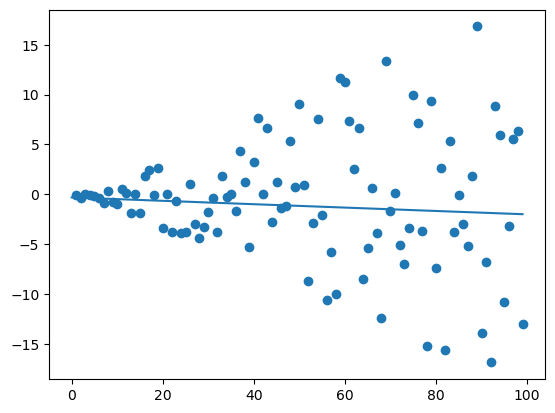

In [28]:
import matplotlib.pyplot as plt

xgbr = XGBRegressor(booster='gblinear')
xgbr.fit(X, y)

plt.scatter(X, y)
plt.plot((0, 99), (xgbr.intercept_, xgbr.coef_*99 + xgbr.intercept_))
plt.show()

# plt.plot((0, 99), (xgbr.intercept_, xgbr.coef_*99 + xgbr.intercept_)): 
# 이 줄은 XGBRegressor 모델의 절편(intercept)과 계수(coefficient)를 사용하여 선형 회귀선을 그리는 부분입니다.
# plt.plot() 함수를 사용하여 선을 그리는데, 첫 번째 인자 (0, 99)는 선의 끝점의 X 좌표를 지정하고, 
# 두 번째 인자 (xgbr.intercept_, xgbr.coef_*99 + xgbr.intercept_)는 선의 끝점의 Y 좌표를 지정합니다. 
# ㅡ선의 방정식은 y = xgbr.coef_ * x + xgbr.intercept_로 계산됩니다.


Y 좌표가 계산되는 방식을 이해하기 위해 두 번째 인수를 더 분석해 보겠습니다.

xgbr.intercept_: XGBRegressor 모델에서 얻은 선형회귀선의 절편항입니다. 
X(독립 변수)가 0일 때 Y(종속 변수)의 값을 나타냅니다. 절편은 선이 Y축과 교차하는 지점입니다.
xgbr.coef_: XGBRegressor 모델에서 얻은 선형회귀선의 계수항입니다. X의 단위 변화에 대해 Y가 얼마나 많이 변하는지 나타내는 선의 기울기를 나타냅니다. 선의 기울기를 결정합니다.
xgbr.coef_*99 + xgbr.intercept_: X 값 99에 해당하는 끝점의 Y 좌표를 계산하는 부분입니다. 계수(xgbr.coef_)에 99(X 값)를 곱하여 계산합니다. Y 좌표에 대한 기울기의 기여도, 그리고 최종 Y 좌표 값을 얻기 위해 절편(xgbr.intercept_)을 추가합니다.
(0, 99)를 X 좌표로 지정하고 (xgbr.intercept_, xgbr.coef_*99 + xgbr.intercept_)를 Y 좌표로 지정하여 plt.plot() 함수는 이 두 점을 연결합니다. 직선을 그립니다. 방정식 y = xgbr.coef_ * x + xgbr.intercept_는 이 선의 수학 공식을 나타냅니다. XGBRegressor 모델에서 학습한 계수를 기반으로 Y가 X와 선형적으로 어떻게 변하는지 설명합니다.

In [30]:
regression_model(XGBRegressor(booster = 'gblinear'))

6.214946302686012

In [29]:
regression_model(XGBRegressor(booster = 'gbtree'))

9.372359516507444

- 여기서 볼 수 있듯이 선형 데이터셋에서 gblinear가 훨씬 좋은 성능을 낸다.
- 동일한 데이터셋에 사이킷런의 LinearRegression 클래스를 적용하여 비교해보죠.

In [31]:
regression_model(LinearRegression())

6.214962315808842

## 8.2.3 gblinear 분석
- gblinear는 강력한 옵션이지만 선형 모델이 트리 기반 모델보다 더 높은 성능을 낼 수 있다는 확신이 있을 때만 사용해야 한다.
- gblinear는 Linear는 LinearRegression과 거의 동일한 수준의 성능을 낸다. XGBoost에서 데이터셋이 크고 선형적일 때 gblinear가 기본 학습기로 좋은 선택이다. gblinear는 분류에서도 사용할 수 있다. 다음 절에서 적용해보겠다.

## 8.3 비교하기
- dart 기본 학습기는 둘 다 그레이디언트 부스팅 트리라는 점에서 gbtree와 비슷하다. dart는 부스팅 단계마다 트리를 삭제(드롭아웃이라고 부른다)하는 것이 주요한 차이점이다. 이 절에서 회귀와 분류 문제를 사용해 dart와 다른 기본 학습기를 비교해보겠다.

## 8.3.1 dart를 사용한 XGBRegressor
- 당뇨병 데이터셋에서 dart의 성능을 확인해보자.

In [33]:
# 1. 먼저 이전처럼 load_diabetes() 함수를 사용해 X와 y를 로드한다.
X,y = load_diabetes(return_X_y = True)

In [40]:
# 2. booster = 'dart'로 설정해 dart를 기본 학습기로 사용하는 XGBRegressor를 regression_model()함수에 전달한다.
regression_model(XGBRegressor(booster = 'dart', rate_drop = 0.4))

63.60272785630248

- booster = 'dart'일 때 rate_drop 매개변수는 드롭아웃될 확률을 지정한다.
- rate_drop = 0.5로 지정하여 gbtree보다 좋은 성능을 냈다.
- 분류 데이터셋에서도 dart와 gbtree를 비교해보겠다.

## 8.3.2 dart를 사용한 XGBClassifier
- 이 책에서 인구 조사 데이터셋을 여러 장에서 사용했다. 1장에서 이 데이터셋을 정제한 버전이 8장의 깃허브 폴더에 포함되어 있다.
- 이 데이터셋을 사용해 dart의 성능을 테스트해 보자.

In [41]:
# 1. 인구 조사 데이터셋을 데이터프레임으로 로드하고 마지막 열을 제외한 모든 열을 특성 X로 만들고 마지막 열을 타깃 y로 만든다.
df_census = pd.read_csv('census_cleaned.csv')
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:,-1]

이 장의 서두에서 정의한 regression_model()함수와 비슷하게 모델을 입력으로 받아 cross_val_score()의 결과 점수를 평균하여 출력하는 함수를 정의한다.

In [44]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state= 2)

def classification_model(model):
    scores = cross_val_score(model, X_census, y_census, scoring = 'accuracy', cv=skf)
    return scores.mean()

In [46]:
# 2. 이제 booster = 'gbtree'와 booster = 'dart'로 설정한 XGBClassifier를 사용해 함수를 호출하고 결과를 비교한다.
# 데이터셋이 크기 때문에 실행 시간이 이전보다 오래 걸릴 것이다.
# a) booster = 'gbtree'일 때
classification_model(XGBClassifier(booster = 'gbtree'))

0.8711649041738863

In [47]:
# b) booster = 'dart'일 때
classification_model(XGBClassifier(booster = 'dart', rate_drop = 0.1))

0.8702743586725623

- 드롭아웃 확률을 0.1로 지정하여 아주 조금 정확도를 높였다.
- 그다음 dart와 gblinear를 비교해보겠다. 
- gblinear는 분류에도 사용할 수 있다.
- 로지스틱 회귀처럼 가중치 합에 시그모이드 함수를 적용한다.

In [48]:
# 1. booster = 'gblinear'로 지정한 XGBClassifier로 Classification_model()함수를 호출한다.
classification_model(XGBClassifier(booster = 'gblinear'))

0.8512023816664535

- 선형 기본 학습기의 성능이 트리 기반 학습기보다 낮다.

In [49]:
# 2. gblinear와 로지스틱 회귀를 비교해보자. 
# 데이터셋이 크기 때문에 LogisticRegression 클래스의 max_iter 매개변수를 기본값 100에서 1000으로 바꿔 수렴하기 위한 반복횟수를 늘려준다.
# 여기에서는 max_iter를 증가시키면 정확도가 향상된다.
classification_model(LogisticRegression(max_iter = 1000))

0.7959523072547026

- gblinear가 로지스틱 회귀보다 확실히 더 좋다. 
- 분류에서 XGBoost의 gblinear가 로지스틱 회귀의 가능한 대안이라는 점을 꼭 기억해라.

- 기본 학습기로써 dart를 gbtree나 gblinear와 비교해보았다. 이제 dart 매개변수를 조정해보자.

## 8.3.3 dart 매개변수
- dart는 gbtree 매개변수를 모두 포함하고 드롭아웃 비율과 같은 매개변수를 추가로 제공한다.
- 전체 매개변수에 대한 자세한 정보는 공식 문서를 참고하자.
- 다음은 dart에 추가되는 XGBoost 매개변수를 요약한 것이다. 

### sample_type
- sample_type의 옵션은 균등하게 드롭아웃하는 uniform과 가중치에 비례하여 드롭하웃하는 weighted가 있다.
---
- 기본값: 'uniform'
- 범위: ['uniform', 'weighted']
- 드롭아웃될 트리를 선택하는 방법을 결정한다.



### normalize_type
- normalize_type의 옵션은 새로운 트리가 드롭아웃된 트리와 같은 가중치를 가지는 tree와 새로운 트리가 드롭아웃된 트리의 합과 동일한 가중치를 가지는 forest가 있다.
---

- 기본값: 'tree'
- 범위: ['tree', 'forest']
- 트리의 가중치를 정규화한다.

### rate_drop
- rate_drop은 드롭아웃될 트리의 비율을 지정한다.
---
- 기본값: 0.0
- 범위: [0.0, 1.0]
- 드롭아웃될 트리 비율이다.

### one_drop
- One_drop을 1로 지정하면 부스팅 단계에서 적어도 하나의 트리가 항상 드롭아웃된다.
---
- 기본값: 0
- 범위: [0,1]
- 드롭아웃될 트리가 하나도 선택되지 않을  경우 최소한 하나의 트리를 드롭아웃한다.

### skip_drop
- skip_drop은 드롭아웃을 건너 뛸 확률을 지정한다. skip_drop은 rate_rop이나 one_drop보다 높은 우선순위를 가진다.
- 기본적으로 각 트리는 드롭아웃될 확률이 동일하다. 따라서 한 부스팅 단계에서 어떤 트리도 드롭아웃되지 않을 가능성이 있다.
- skip_drop은 이 확률을 조정하여 드롭아웃 횟수를 조절한다.
---
- 기본값: 0.0
- 범위: [0.0, 1.0]
- 드롭아웃을 건너 뛸 확률을 지정한다.

- 이제 dart 매개변수를 바꾸고 점수를 비교해보겠다.



### 8.3.4 dart 매개변수 적용
- 부스팅 단계마다 최소한 하나의 트리를 드롭아웃하기 위해서 one_drop = 1로 지정한다.
- classification_model() 함수를 사용해 인구 조사 데이터셋에 이를 적용해보자. 

In [50]:
classification_model(XGBClassifier(booster = 'dart', one_drop = 1))

0.8719940529072264

- 정확도가 0.1 퍼센트 포인트 높아졌다. 이는 부스팅 단계마다 적어도 하나의 트리를 드롭아웃하는 것이 도움이 된다는 뜻이다.
- 드롭아웃을 적용해 모델의 성능이 달라졌다. 이제 작고 빠른 당뇨병 데이터셋을 사용해 다른 매개변수를 적용해보겠다.

In [53]:
# 1. regression_model()함수를 사용해 sample_typedmf uniform에서 weighted로 바꾼다.
regression_model(XGBRegressor(booster = 'dart', rate_drop = 0.5,
                             sample_type = 'weighted'))

# 앞서 기본값 unifrom보다 오차가 조금 더 커졌다.

64.78061696170955

In [54]:
# 2. normalize_type을 forest로 바꾸어보겠다.
regression_model(XGBRegressor(booster = 'dart', rate_drop = 0.5,
                             normalize_type = 'forest'))

63.35920574990998

In [55]:
# 3. one_drop =1로 지정하여 부스팅 단계마다 최소한 하나의 트리를 드롭아웃시켜보겠다.
regression_model(XGBRegressor(booster = 'dart', one_drop = 1))

61.79383589165782

- 드롭아웃할 트리의 확률을 지정하는 rate_drop은 다음처럼 grid_search()함수로 최적의 값을 찾을 수 있다.

In [56]:
grid_search(params = {'rate_drop':[0.01, 0.1, 0.2, 0.4]},
           reg = XGBRegressor(booster = 'dart', one_drop = 1))

최상의 매개변수: {'rate_drop': 0.2}
최상의 점수: 61.046435908538385


- 이 점수는 지금까지 가장 좋은 점수이다.
- 부스팅 단계에서 드롭아웃하지 않을 확률을 지정하는 skip_drop으로도 비슷한 탐색을 수행할 수 있다.

In [57]:
grid_search(params = {'skip_drop': [0.01, 0.1, 0.2, 0.4]},
           reg = XGBRegressor(booster = 'dart', one_drop =1))

최상의 매개변수: {'skip_drop': 0.1}
최상의 점수: 62.929666979954796


## 8.3.5 dart 분석
- dart는 XGBoost 프레임워크의 강력한 옵션이다. dart는 gbtree의 매개변수를 모두 사용할 수 있기 때문에 매개변수를 튜닝할 때 기본 학습기를 gbtree에서 dart로 쉽게 바꿀 수 있다. one_drop, rate_drop, normalize_type등과 같은 새로운 매개변수를 실험하여 성능을 높일 수 있는 장점이 있다. dart는 XGBoost를 사용한 연구와 모델 구축에서 실험해볼 가치가 있는 기본학습기다.
---
dart에 대해 잘 이해했으므로 랜덤 포레스트로 넘어가 보자.

## 8.4 XGBoost 랜덤 포레스트
- XGBoost에서 랜덤 포레스트를  구현하는 방법은 두 가지이다. 
- 첫째는 랜덤 포레스트를 기본 학습기로 사용하는 것이다. 둘째는 스탠드얼론 방식인 XGBRFRegressor와 XGBRFClassifier를 사용하는 것이다. 먼저 기본학습기로 랜덤포레스트를 사용해보겠다.

# 8.4.1 랜덤 포레스트 기본 학습기
- 랜덤 포레스트 기본 학습기는 booster 매개변수에서 지정하지 않는다.
- num_parallel_tree 매개변수를 기본값 1보다 크게 지정하면 gbtree(또는 dart)를 부스팅 랜덤 포레스트로 바꾼다.
- 즉 부스팅 단계마다 하나의 트리가 아니라 여러 개의 트리를 사용하여 앙상블을 구성한다.
- 다음은 num_parallel_tree 매개변수를 간략하게 정리한 것이다.

### num_parallel_tree
- num_parallel_tree는 부스팅 단계에서 만들 트리 개수를 지정한다.
---
- 기본값:1
- 범위: [1, inf]
- 한 부스팅 단계에서 만들 트리 개수
- 1보다 크게 지정하면 부스팅 랜덤 포레스트가 된다.
---
- XGBoost의 랜덤 포레스트 기본 학습기가 실제 어떻게 동작하는지 알아보자.

In [61]:
# 1. booster = 'gbtree'로 지정한 XGBRegressor로 regression_model() 함수를 호출한다. 추가적으로 
# num_parallel_tree = 25으로 설정하여 부스팅 단계마다 25개의 트리를 구성한다.

regression_model(XGBRegressor(booster = 'gbtree', num_parallel_tree = 25))

65.95866495368594

- 이 경우에 부스팅 단계마다 하나의 트리를 사용하는 gbtree와 거의 동일한 성능을 낸다. 그레이디언트 부스팅은 이전 트리의 실수로부터 학습하도록 고안되었다. 강력한 랜덤 포레스트로 부스팅을 시작하면 학습할 것이 없거나 아주 적다.

- 랜덤 포레스트를 XGBoost의 기본 학습기로 사용하는 방법을 알아보았으므로 이제 스탠드얼론 방식의 랜덤 포레스트를 만들어보자.

##  8.4.2 스탠드얼론 랜덤 포레스트
- XGBoost는 XGBRegressor와 XGBClassifier 외에도 랜덤 포레스트를 위한 XGBRFRegressor와 XGBRFClassifier 클래스를 제공한다.
---
- XGBoost 공식 문서에 따르면 랜덤 포레스트 사이킷런 API는 아직 실험적이며 향후 인터페이스가 바뀔 수 있다. 이글을 쓰는 시점에 XGBRFRegressor와 XGBRFClassifier는 다음 매개변수를 포함하고 있다.

#### n_estimators
- XGBRFRegressor나 XGBRClassifier를 사용하여 랜덤 포레스트를 만들 때는 num_parallel_tree가 아니라 n_estimators를 사용한다. XGBRFRegressor와 XGBRFClassifier는 그레이디언트 부스팅이 아니라 전통적인 랜덤 포레스트처럼 배깅 방식이다.
---
- 기본값: 100
- 범위: [1, inf]
- 랜덤 포레스트를 위해 num_parallel_tree로 사용된다.

#### learning_rate
- learning_rate는 일반저긍로 한 단계의 부스팅을 사용하는 XGBRFRegressor나 XGBRFClassifier가 아니라 부스터를 포함하는 모델을 위한 것이다. 그럼에도 불구하고 learning_rate를 기본값 1에서 바꾸면 결과가 달라지기 때문에 일반적으로 이 매개변수를 조정하는 것은 권장되지 않는다.
---
- 기본값: 1
- 범위: [0,1]

#### subsample, colsample_by_node
- 두 매개변수의 기본값은 0.8이므로 XGBRFRegressor와 XGBRFClassifier가 기본적으로 과대작합될 가능성이 적다.
- 이것이 XGBoost와 사이킷런의 랜덤 포레스트 구현의 큰 차이중 하나다.
- 기본값
- 범위:[0,1]
- 값을 줄이면 과대적합을 만든 데 도움이 된다.

In [64]:
# 1. 먼저 regression_model()함수에 XGBRFRegressor 객체를 전달한다.
regression_model(XGBRFRegressor())

# 이 점수는 gbtree모델보다 조금 더 좋고 이 장에서 구한 가장 좋은 선형 모델보다는 조금 나쁘다.

59.43613846827259

In [65]:
# 2. 비교를 위해 같은 함수에 RandomForestRegressor를 전달하여 성능을 확인해보겠다.
regression_model(RandomForestRegressor())

59.44526192030271

- 이번에는 대용량 분류 데이터인 인구 조사 데이터셋에서 XGBoost의 랜덤 포레스트와 사이킷런의 랜덤 포레스트를 비교해보겠다.

In [67]:
# 1. classification_model 함수에 XGBRFClassifier 객체를 전달한다.
classification_model(XGBRFClassifier())

0.8554712913994351

In [68]:
# 2. 이번에는 randomForestClassifier를 사용해서 결과를 비교해보겠다.
classification_model(RandomForestClassifier())

0.8570682062448529

### XGBoost의 랜덤 포레스트 구현 비교
- XGBoost의 랜덤 포레스트 구현은 그레이디언트 부스팅 구현을 그대로 사용하면서 한 번의 부스팅 단계에서 여러 개의 트리를 만드는 식이다. XGBoost의 기본 파이썬 API의 경우 num_boost_round = 1, num_parallel_tree를 1보다 크게 설정한다. 랜덤포레스트처럼 특성을 랜덤 샘플링하기 위해 colsample_bynode를 1보다 작게 설정한다. 학습률은 eta는 1로 설정해야한다.
---
- XGBRFRegressor와 XGBRFCLassifier 클래스는 XGBRegressor와 XGBClassifier를 상속하고 n_estimators 값을 파이썬 API의 num_parallel_tree로 설정하고 num_boost_round를 1로 고정하는 식으로 구현되어 있다.(XGBRegressor와 XGBClassifier는 n_estimators 값을 num_boost_round로 사용한다.) 또한 기본적으로 subsample = 0.8, learning_rate = 1.0, colsample_bynode = 0.8을 사용한다. 이런 랜덤 포레스트 구현이 스탠드얼론 방식이다.
---
- 랜덤 포레스트를 기본 학습기로 사용하기 위해서는 num_parallel_tree를 1보다 크게 설정한다.
- 이 때 만들어지는 총 트리 개수는 num_boost_round * num_parallel_tree(사이킷런 API의 경우 n_estimators * num_parallel_tree)이다.

## 8.4.3 XGBoost 랜덤 포레스트 분석
- num_parallel_tree를 1보다 크게 설정하여 언제든지 랜덤 포레스트를 XGBoost의 기본 학습기로 테스트해볼 수 있다. 하지만 부스팅은 강한 모델이 아니라 약한 모델로부터 학습되도록 고안되었기 때문에 num_parallel_tree를 1에 가까운 값으로 설정해야한다. 랜덤 포레스트를 기본 학습기로 사용하는 일은 많지 않다. 하나의 트리를 부스팅해서 최적의 점수를 얻지 못하면 랜덤 포레스트 기본 학습기가 대안일 수 있다.
---
- 또한 XGBoost의 랜덤 포레스트 구현인 XGBRFRegressor와 XGBRFClassifier는 사이킷런의 랜덤 포레스트 대신 사용할 수 있다. XGBoost의 XGBRFRegressor와 XGBRFClassifier는 사이킷런의 RandomForestRegressor, RandomForestClassifier와 거의 비슷한 성능을 제공한다. 머신러닝 커뮤니티에서 XGBoost의 전반적인 성공을 감안할 때 XGBRFRegressor와 XGBRFClassifier를 사용해볼 가치가 있다. 

### 마치며
- 이 장에서 gbtree, dart, gblinear, 랜덤 포레스트 같은 XGBoost의 모든 기본 학습기를 회귀와 분류 데이터셋에 적용해보면서 XGBoost에 대한 지식을 크게 넓혔다. 성능을 높이기 위해 기본 학습기마다 고유한 매개변수를 살펴보고, 튜닝해보았다. 선형 데이터셋에 gblinear를 적용해보고, XGBRFRegressor와 XGBRFClassifier를 사용해 부스팅이 없는 XGBoost 랜덤 포레스트를 만들었다. 모든 기본 학습기를 다루어보았으므로 XGBoost를 다루는 수준이 한 층 높아졌다.
--- 
- 다음 장에서는 캐글 마스터의 팁과 기법을 분석하여 XGBoost 기술을 더욱 발전시켜보겠다.